In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv ('C:\\Users\\anas.mahmoud\\Downloads\\social_media_data.csv')

In [3]:
df

,date,platform,post_type,likes,shares,comments,views
0,5/24/2023,Twitter,image,868,238,352,8836
1,2/23/2023,Twitter,image,944,610,146,5554
2,3/18/2023,Instagram,image,1067,858,365,4018
3,6/12/2023,Twitter,text,780,427,100,6999
4,2/3/2023,Instagram,text,836,893,443,5802
...,...,...,...,...,...,...,...
1995,1/15/2023,Facebook,video,2039,523,371,4780
1996,11/13/2022,Twitter,image,1652,891,410,8741
1997,9/18/2023,Twitter,video,528,207,341,6588
1998,4/23/2023,Facebook,video,1288,893,328,8349


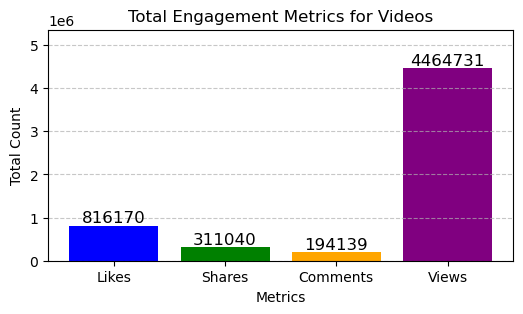

In [4]:
videos_df = df[df['post_type']=='video']
total_video_likes = videos_df['likes'].sum()
total_video_shares = videos_df['shares'].sum()
total_video_comments = videos_df['comments'].sum()
total_video_views = videos_df['views'].sum()

# Define metrics and their totals
metrics = ['Likes', 'Shares', 'Comments', 'Views']
totals = [total_video_likes, total_video_shares, total_video_comments, total_video_views]

# Plotting the bar chart
plt.figure(figsize=(6, 3))
plt.bar(metrics, totals, color=['blue', 'green', 'orange', 'purple'])
plt.xlabel('Metrics')
plt.ylabel('Total Count')
plt.title('Total Engagement Metrics for Videos')
plt.ylim(0, max(totals) * 1.2)  # Setting y-axis limit slightly above the maximum total
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the values on top of each bar
for i, total in enumerate(totals):
   plt.text(i, total + 5000, str(total), ha='center', va='bottom', fontsize=12)

plt.show()

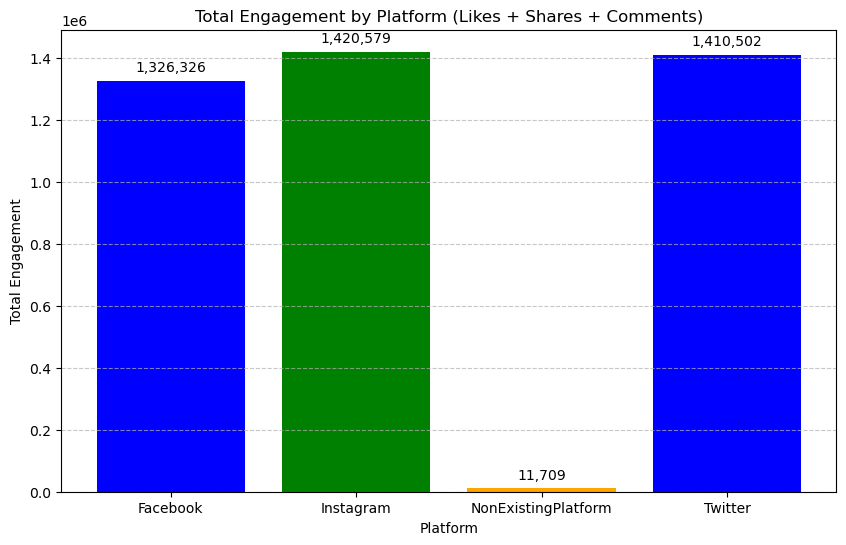

In [6]:
df['engagement'] = df['likes'] + df['shares'] + df['comments']
platform_engagement = df.groupby('platform')['engagement'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(platform_engagement['platform'], platform_engagement['engagement'], color=['blue', 'green', 'orange'])
plt.xlabel('Platform')
plt.ylabel('Total Engagement')
plt.title('Total Engagement by Platform (Likes + Shares + Comments)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the values on top of each bar
for i, engagement in enumerate(platform_engagement['engagement']):
    plt.text(i, engagement + 20000, f"{engagement:,}", ha='center', va='bottom', fontsize=10)

plt.show()

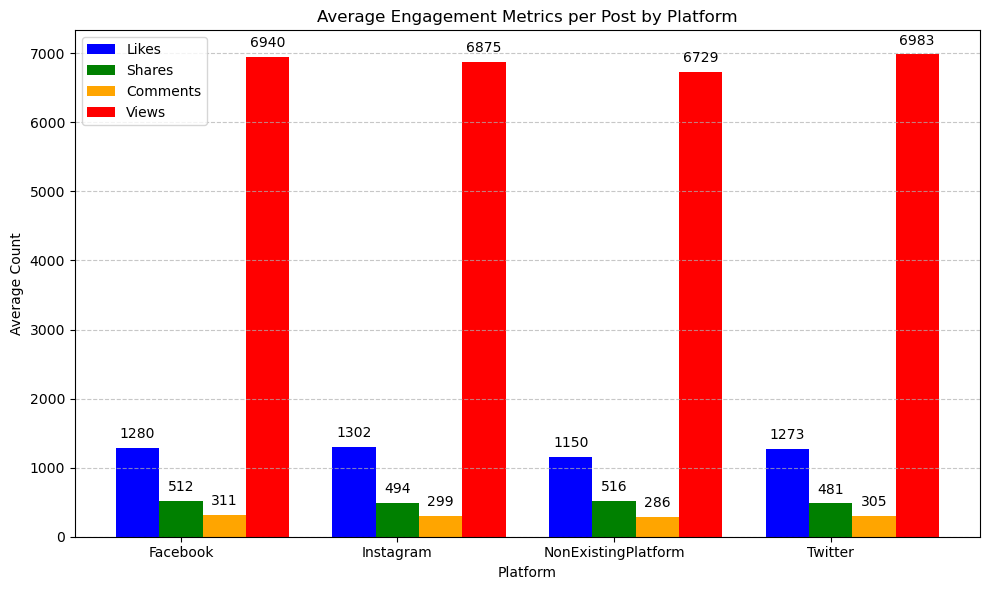

In [27]:
avg_metrics = df.groupby('platform')[['likes', 'shares', 'comments', 'views']].mean().reset_index()
# Plotting the grouped bar chart
plt.figure(figsize=(10, 6))

bar_width = 0.2
index = avg_metrics.index

plt.bar(index - bar_width, avg_metrics['likes'], width=bar_width, label='Likes', color='blue')
plt.bar(index, avg_metrics['shares'], width=bar_width, label='Shares', color='green')
plt.bar(index + bar_width, avg_metrics['comments'], width=bar_width, label='Comments', color='orange')
plt.bar(index + 2*bar_width, avg_metrics['views'], width=bar_width, label='Views', color='red')

plt.xlabel('Platform')
plt.ylabel('Average Count')
plt.title('Average Engagement Metrics per Post by Platform')
plt.xticks(index, avg_metrics['platform'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, platform in enumerate(avg_metrics['platform']):
    plt.text(i - 0.2, avg_metrics.loc[i, 'likes'] + 100, f"{avg_metrics.loc[i, 'likes']:.0f}", ha='center', va='bottom', fontsize=10, color='black')
    plt.text(i - 0, avg_metrics.loc[i, 'shares'] + 100, f"{avg_metrics.loc[i, 'shares']:.0f}", ha='center', va='bottom', fontsize=10, color='black')
    plt.text(i + 0.2, avg_metrics.loc[i, 'comments'] + 100, f"{avg_metrics.loc[i, 'comments']:.0f}", ha='center', va='bottom', fontsize=10, color='black')
    plt.text(i + 0.4, avg_metrics.loc[i, 'views'] + 100, f"{avg_metrics.loc[i, 'views']:.0f}", ha='center', va='bottom', fontsize=10, color='black')
plt.tight_layout()
plt.show()


In [32]:
post_counts = df.groupby(['platform', 'post_type']).size().reset_index(name='count')
post_counts_pivot = post_counts.pivot(index='platform', columns='post_type', values='count')
print(post_counts_pivot)

post_type            image  text  video
platform                               
Facebook               218   204    209
Instagram              267   203    208
NonExistingPlatform      1     3      2
Twitter                249   219    217


In [33]:
df['engagement'] = df['likes'] + df['shares'] + df['comments']

# Group by post_type and calculate average engagement
avg_engagement = df.groupby('post_type')['engagement'].mean()

# Find the post type with the highest average engagement
highest_avg_engagement = avg_engagement.idxmax()
max_avg_engagement = avg_engagement.max()

print(f"The post type with the highest average engagement is {highest_avg_engagement} with an average engagement of {max_avg_engagement:.2f}.")

The post type with the highest average engagement is text with an average engagement of 2116.38.


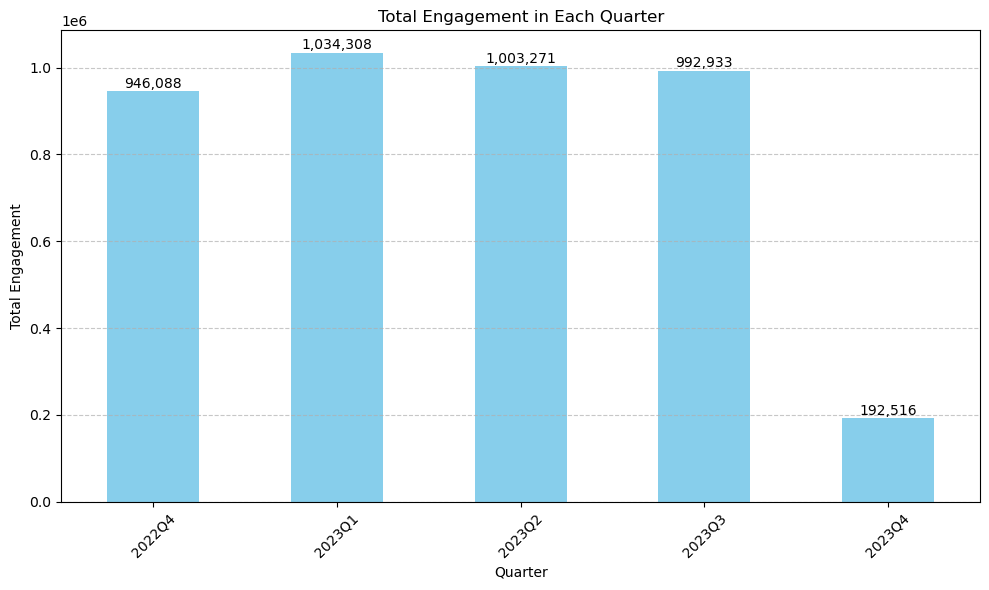

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataset is stored in a DataFrame named 'df'
# Convert 'NaN' values to numeric NaN values for accurate calculations
df = df.replace('NaN', pd.NA).replace('null', pd.NA).apply(pd.to_numeric, errors='ignore')

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Calculate engagement as the sum of likes, shares, and comments
df['engagement'] = df['likes'].fillna(0) + df['shares'].fillna(0) + df['comments'].fillna(0)

# Extract quarter from date
df['quarter'] = df['date'].dt.to_period('Q')

# Group by quarter and calculate total engagement
quarterly_engagement = df.groupby('quarter')['engagement'].sum()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
quarterly_engagement.plot(kind='bar', color='skyblue')

plt.xlabel('Quarter')
plt.ylabel('Total Engagement')
plt.title('Total Engagement in Each Quarter')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding labels to each bar
for i, engagement in enumerate(quarterly_engagement):
    plt.text(i, engagement + 1000, f"{engagement:,}", ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()
